In [3]:
%matplotlib inline

import pandas as pd
from pandas.util.testing import test_parallel
np.random.seed(1234)
pd.set_option('max_rows',12)
pd.__version__

'0.16.2-113-gbbec57d'

In [4]:
N = 1000000
ngroups = 1000

In [5]:
df = DataFrame({'key' : np.random.randint(0,ngroups,size=N),
                'data' : np.random.randn(N) })

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
data    1000000 non-null float64
key     1000000 non-null int64
dtypes: float64(1), int64(1)
memory usage: 22.9 MB


In [7]:
def f():
    return df.groupby('key')['data'].mean()
f()

key
0     -0.059063
1      0.022777
2      0.005029
3      0.021176
4     -0.013846
5     -0.007763
         ...   
994    0.043225
995   -0.005569
996   -0.040259
997    0.017970
998    0.010619
999    0.004999
Name: data, dtype: float64

In [8]:
# run consecutivily
def g2():
    for i in range(2):
        f()
def g4():
    for i in range(4):
        f()
def g8():
    for i in range(8):
        f()

# run in parallel
@test_parallel(num_threads=2)
def pg2():
    f()

@test_parallel(num_threads=4)
def pg4():
    f()

@test_parallel(num_threads=8)
def pg8():
    f()

In [9]:
%timeit f()

10 loops, best of 3: 23.4 ms per loop


# single thread

In [10]:
%timeit g2()

10 loops, best of 3: 44.3 ms per loop


In [11]:
%timeit g4()

10 loops, best of 3: 89.5 ms per loop


In [12]:
%timeit g8()

10 loops, best of 3: 179 ms per loop


# multi threads

In [13]:
%timeit pg2()

10 loops, best of 3: 25.5 ms per loop


In [14]:
%timeit pg4()

10 loops, best of 3: 38.1 ms per loop


In [15]:
%timeit pg8()

10 loops, best of 3: 73.6 ms per loop


# results

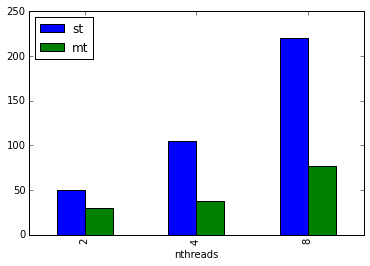

In [16]:
results = DataFrame({ 'st' : [49.5,105,220], 
                      'mt' : [29.6,37.7,77.1]}, 
                    index=Index([2,4,8],name='nthreads'))
results['speedup'] = results['st']/results['mt']
results[['st','mt']].plot(kind='bar')

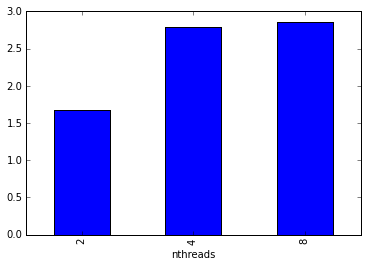

In [17]:
results['speedup'].plot(kind='bar')